In [1]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt

## Helper Functions

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

# PPO parameter dependency

## clip (epsilon)

In [3]:
# You can load the files with pickle.load 
#  with open(filename, 'rb') as f:....
# consider using a for-loop over the different eps values

file_name = "results/PPO_LunarLander-v3-eps0.2-stat.pkl"

with open(file_name, 'rb') as f:
    stats = pickle.load(f)


print(type(stats))  
print(stats.keys()) 

<class 'dict'>
dict_keys(['rewards', 'lengths', 'eps', 'seed'])


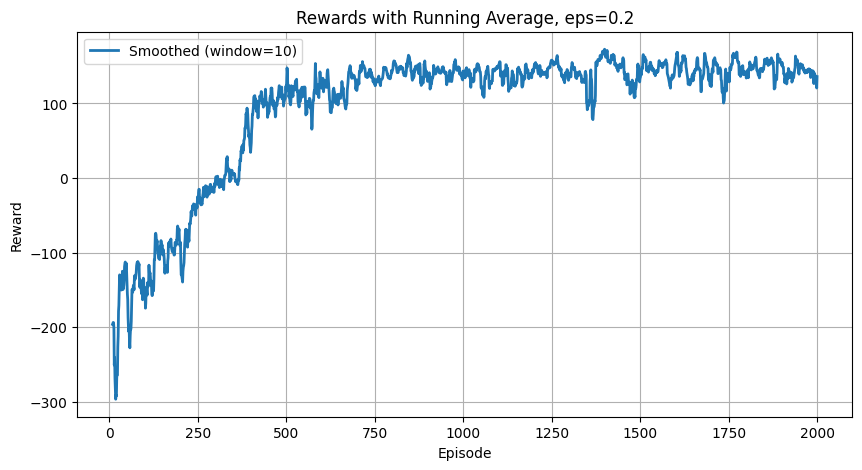

In [12]:
rewards = stats['rewards']

window_size = 10
smoothed_rewards = running_mean(rewards, window_size)

plt.figure(figsize=(10, 5))
plt.plot(range(window_size - 1, len(rewards)), smoothed_rewards, label=f'Smoothed (window={window_size})', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards with Running Average, eps=0.2')
plt.legend()
plt.grid(True)
plt.show()


## restarts for eps=?

In [22]:
eps_vals = [0.01,0.1,0.2,0.5,0.75]

base_file_name = "results/PPO_LunarLander-v3-eps"

stats_files = [f"{base_file_name}{eps}-stat.pkl" for eps in eps_vals]


In [23]:
stats_files

['results/PPO_LunarLander-v3-eps0.01-stat.pkl',
 'results/PPO_LunarLander-v3-eps0.1-stat.pkl',
 'results/PPO_LunarLander-v3-eps0.2-stat.pkl',
 'results/PPO_LunarLander-v3-eps0.5-stat.pkl',
 'results/PPO_LunarLander-v3-eps0.75-stat.pkl']

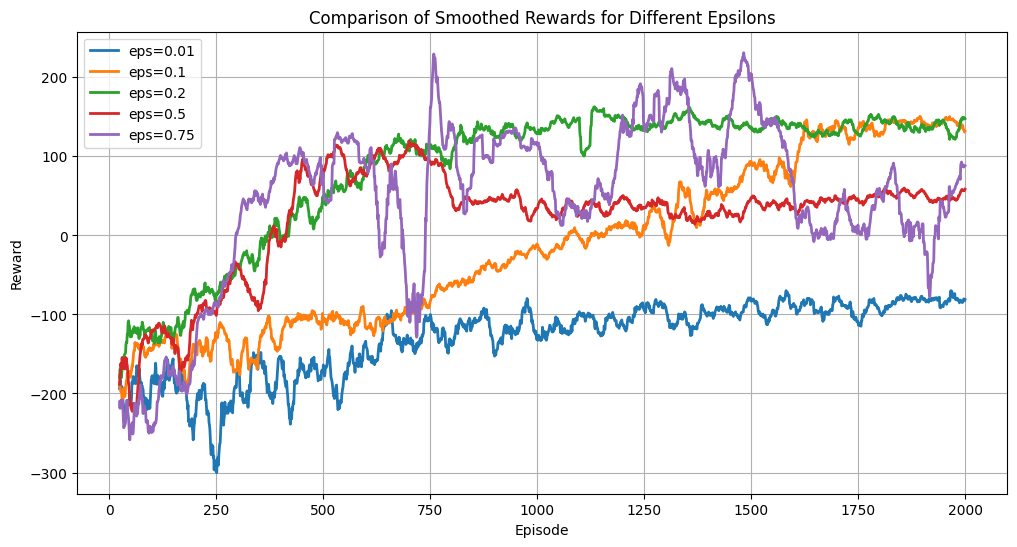

In [27]:
# Plot smoothed rewards for each epsilon




window_size = 25
plt.figure(figsize=(12, 6))

for i, file in enumerate(stats_files):
    with open(file, 'rb') as f:
        stats = pickle.load(f)
    rewards = stats['rewards']
    smoothed_rewards = running_mean(rewards, window_size)
    plt.plot(
        range(window_size - 1, len(rewards)),
        smoothed_rewards,
        label=f'eps={eps_vals[i]}',
        linewidth=2
    )

# Add plot labels and legend
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Comparison of Smoothed Rewards for Different Epsilons')
plt.legend()
plt.grid(True)
plt.show()

# Eps = 0.2 seems to work the best in this case
## Running for this value of eps 5 times with different seeds:

In [39]:
seed_vals = [10, 22, 50, 44, 5]

base_file_name = "results_seed/PPO_LunarLander-v3-eps0.2-seed"

stats_files = [f"{base_file_name}{seed}-stat.pkl" for seed in seed_vals]


In [40]:
stats_files

['results_seed/PPO_LunarLander-v3-eps0.2-seed10-stat.pkl',
 'results_seed/PPO_LunarLander-v3-eps0.2-seed22-stat.pkl',
 'results_seed/PPO_LunarLander-v3-eps0.2-seed50-stat.pkl',
 'results_seed/PPO_LunarLander-v3-eps0.2-seed44-stat.pkl',
 'results_seed/PPO_LunarLander-v3-eps0.2-seed5-stat.pkl']

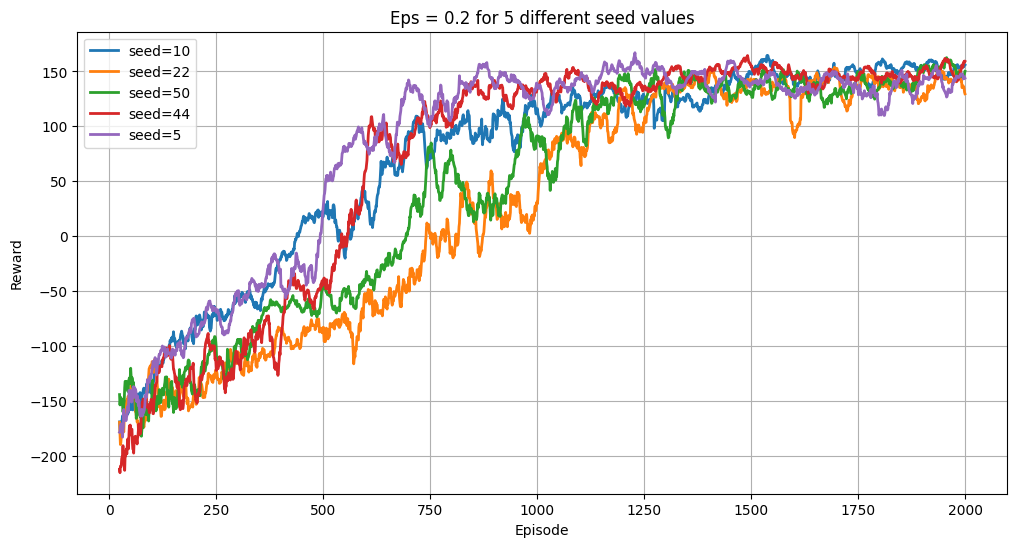

In [42]:
# Plot smoothed rewards for each epsilon




window_size = 25
plt.figure(figsize=(12, 6))

for i, file in enumerate(stats_files):
    with open(file, 'rb') as f:
        stats = pickle.load(f)
    rewards = stats['rewards']
    smoothed_rewards = running_mean(rewards, window_size)
    plt.plot(
        range(window_size - 1, len(rewards)),
        smoothed_rewards,
        label=f'seed={seed_vals[i]}',
        linewidth=2
    )

# Add plot labels and legend
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Eps = 0.2 for 5 different seed values')
plt.legend()
plt.grid(True)
plt.show()

# The GIFs are generated for the first 4 episodes. The spaceship manages to land properly!